## Fetch Weather Data

In [72]:
from requests import get
import json
from pprint import pprint

from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    # convert degrees to radians
    lon1 = radians(lon1)
    lat1 = radians(lat1)
    lon2 = radians(lon2)
    lat2 = radians(lat2)
    dlon = lon2 - lon1 # difference between two longitudes
    dlat = lat2 - lat1 # difference between two latitudes
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    distance = 2 * asin(sqrt(a)) * 6371 #6371 is the radius of the Earth
    return distance

def find_closest(stations, my_lat, my_long):
    smallest = 20036 # longest possible distance between two points on the Earth’s surface is 20036km
    for station in stations:
        station_lon = station['weather_stn_long']
        station_lat = station['weather_stn_lat']
        distance = haversine(my_long, my_lat, station_lon, station_lat)
        if distance < smallest:
            smallest = distance
            closest_station = station['weather_stn_id']
    return closest_station

my_lat = 22.3039
my_long = 70.8022
getAllStationsUrl = 'https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getallstations'
getAllWeathersUrl = 'https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getlatestmeasurements/'
stations = get(getAllStationsUrl).json()['items']
# pprint(stations)

# calculate distances between two points on the Earth’s surface
closest_stn = find_closest(stations, my_lat, my_long)
weatherUrl = getAllWeathersUrl + str(closest_stn)
print(weatherUrl)
my_weather = get(weatherUrl).json()["items"]
pprint(my_weather)

https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getlatestmeasurements/989061
[{'air_pressure': 990.05,
  'air_quality': 45.66,
  'ambient_temp': 32.52,
  'created_by': 'Test_Weather',
  'created_on': '2015-08-13T16:09:10Z',
  'ground_temp': 29.44,
  'humidity': 56.9,
  'id': 1010599,
  'rainfall': 0,
  'reading_timestamp': '2015-08-13T16:09:10Z',
  'updated_by': 'Test_Weather',
  'updated_on': '2016-09-02T05:55:43.159Z',
  'weather_stn_id': 989061,
  'wind_direction': 161.62,
  'wind_gust_speed': 0,
  'wind_speed': 0}]


- You could have a look at some weather data from other locations in the world. Use the web to find some longitudes and latitudes of other places, and then fetch weather from their nearest stations.

- How about importing the data from several Weather Stations into some spreadsheet software and drawing some graphs? Or maybe you’d like to try and use Python to draw some graphs for you?

- Create a simple interface using the Python function input which asks for your longitude and latitude and finds the weather near you.

## Graph the Weather

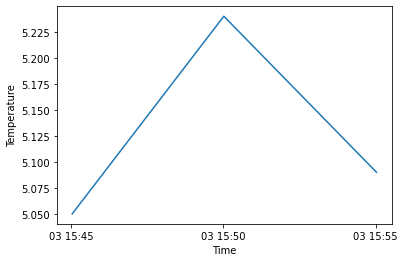

In [83]:
import matplotlib.pyplot as plt
from requests import get
from dateutil import parser
from pprint import pprint

actionWeatherStationIds = [490722, 505307, 505367, 506882, 509944, 515967, 519781, 520153,
520275, 524920, 526297, 528071, 541759, 552355, 553997, 562837, 586603,
586921, 587328, 591441, 595131, 595229, 638013, 667858, 668306, 714944,
748308, 860212, 903578, 903675, 906364, 1023840, 1042161, 1073533,
1100597, 1101852, 1111673, 1158690, 1195685, 1212453, 1253673, 1261471,
1269584, 1307290, 1355086, 1356217, 1373810, 1406723, 1546872, 1551853,
1569432, 1569473, 1572018, 1592317, 1598227, 1604642, 1615966, 1621459,
1624210, 1648902, 1674106, 1682287, 1683740];
currentWeatherUrl = 'https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getallmeasurements/'
weather = get(currentWeatherUrl + '1307290').json()

# a for loop to iterate over the data and pick out all the temperature readings
# temperatures = []
# for record in weather['data']:
#     temperature = record['ambient_temp']
#     temperatures.append(temperature)

# using list comprehension to retrieve temperatures
temperatures = [record['ambient_temp'] for record in weather['items']]
timestamps = [parser.parse(record['reading_timestamp']) for record in weather['items']]

## create a plot of timestamps against temperature and show it
plt.plot(timestamps, temperatures)
plt.ylabel('Temperature')
plt.xlabel('Time')
plt.show()

# try and use some different sensor measurements, and see what your graph looks like?



## Create Folium Map with Weather Stations

In [ ]:
from requests import get # fetch the JSON data from database
import os
import webbrowser
import folium # a tool for visualising data on maps in Python.
import json # process JSON data
import html

def colourgrad(minimum, maximum, value):
    minimum, maximum = float(minimum), float(maximum)
    ratio = 2 * (value - minimum) / (maximum - minimum)
    b = int(max(0, 255*(1 - ratio)))
    g = int(max(0, 255*(ratio - 1)))
    r = 255 - b - g
    hexcolour = '#%02x%02x%02x' % (r,g,b)
    return hexcolour

temps = []
tmax = 0.0
tmin = 100.0
cwd = os.getcwd()
map_ws = folium.Map(location=[20.5937, 78.9629], zoom_start=5)
url = 'https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getallstations'
stations = get(url).json()

longitudes = [station['weather_stn_long'] for station in stations['items']]
latitudes = [station['weather_stn_lat'] for station in stations['items']]
stationNames = [html.escape(station['weather_stn_name']) for station in stations['items']]

for marker in range(len(longitudes)-1):
    folium.Marker([latitudes[marker], longitudes[marker]],
                  icon = folium.Icon(icon = 'cloud', color = 'green'),
                  popup = stationNames[marker]).add_to(map_ws)

map_ws.save('ws_map.html')
webbrowser.open_new('file://' + cwd + '/' + 'dist/ws_map.html')


## Create Folium Map with Weather Stations & Temperatures

In [87]:
from requests import get # fetch the JSON data from database
import os
import webbrowser
import folium # a tool for visualising data on maps in Python.
import json # process JSON data
import html

def colourgrad(minimum, maximum, value):
    minimum, maximum = float(minimum), float(maximum)
    ratio = 2 * (value - minimum) / (maximum - minimum)
    b = int(max(0, 255*(1 - ratio)))
    g = int(max(0, 255*(ratio - 1)))
    r = 255 - b - g
    hexcolour = '#%02x%02x%02x' % (r,g,b)
    return hexcolour

temps = []
tmax = 0.0
tmin = 100.0
cwd = os.getcwd()
map_ws = folium.Map(location=[20.5937, 78.9629], zoom_start=5)
url = 'https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getalllastmeasurement' # getallstations
stations = get(url).json()

longitudes = [station['weather_stn_long'] for station in stations['items']]
latitudes = [station['weather_stn_lat'] for station in stations['items']]
stationNames = [html.escape(station['weather_stn_name']) for station in stations['items']]

for data in stations['items']:
    if 'ambient_temp' in data:
        t = data['ambient_temp']
        if t >= 52:
            t = 52 # approximation
        if t <= -30:
            t = -30 # approximation
        if t > tmax:
            tmax = t
        if t < tmin:
            tmin = t
        temps.append(str(t))

for marker in range(len(longitudes) - 1):
    hcol = colourgrad(tmin, tmax, float(temps[marker]))
    folium.CircleMarker([latitudes[marker], longitudes[marker]],
                  radius = 5,
                  popup = stationNames[marker] + ':' + temps[marker],
                  fill_color = hcol).add_to(map_ws)

map_ws.save('ws_temps_map.html')
webbrowser.open_new('file://' + cwd + '/' + 'ws_temps_map.html')

True

- plot some sensor data, like rainfall?
- try and use a choropleth map to display weather station data based on regions.